In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import mnist

In [5]:
((X_train, y_train),(X_test, y_test))= mnist.load_mnist()

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [ ]:
plt.imshow(X_train[0]).shape #이미지픽셀 하나하나가 한줄로 되어있기 떄문에 오류. -> 한줄로 펴줘야함

In [10]:
X_train[0].reshape(28,28).shape

(28, 28)

2


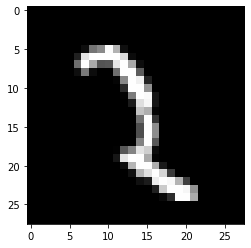

In [29]:
num = 444
print(y_train[num])
plt.imshow(X_train[num].reshape(28,28), cmap="gray")

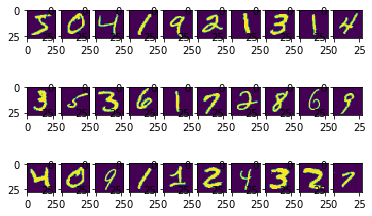

In [36]:
for i in range(30): 
    plt.subplot(3,10,i+1) #3행10열
    plt.imshow(X_train[i].reshape(28,28))

In [38]:
np.bincount(y_train) #0부터 9까지 몇개인지

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

In [40]:
X_train[0].min()

0.0

In [41]:
X_train[0].max()

1.0

In [42]:
X_train.shape

(60000, 784)

In [43]:
X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:5000]
y_test = y_test[:5000]

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10000, 784), (10000,), (5000, 784), (5000,))

### 모델링

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings("ignore")

In [56]:
model = LogisticRegression()
model.fit(X_train, y_train)
print("훈련점수:",model.score(X_train,y_train))
print("테스트 점수:",model.score(X_test, y_test))

훈련점수: 0.9495
테스트 점수: 0.879


In [57]:
model.predict(X_test)

array([7, 2, 1, ..., 0, 4, 0], dtype=uint8)

In [62]:
model.predict_proba(X_test)[0] #proba 풀어서 알려줌

array([7.11698897e-05, 3.87263664e-10, 1.70453916e-03, 4.60730607e-02,
       8.48367562e-06, 7.78665115e-05, 3.41017598e-09, 9.51734500e-01,
       2.71253947e-04, 5.91222586e-05])

In [61]:
model.predict_proba(X_test)[0].sum()

1.0000000000000002

In [64]:
model.coef_.shape

(10, 784)

In [65]:
model = LinearSVC()
model.fit(X_train, y_train)
print("훈련점수:",model.score(X_train,y_train))
print("테스트 점수:",model.score(X_test, y_test))

훈련점수: 0.9679
테스트 점수: 0.8602


### 교차검증

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
C_list = [0.0001,0.001,0.01,0.1,1,10,100]
for c in C_list:
    model = LogisticRegression(C=c)
    result = cross_val_score(model, X_train, y_train, cv=5)
    print("c: {}  /t score: {}".format(c,result.mean()))

c: 0.0001  /t score: 0.7723046371065175
c: 0.001  /t score: 0.8482034920207481
c: 0.01  /t score: 0.8885986657058886
c: 0.1  /t score: 0.9037957971940955
c: 1  /t score: 0.9034960972955982
c: 10  /t score: 0.8895035710210119
c: 100  /t score: 0.874402841320809
